# PROCCESING EPR DATA
TODO сделать аналогично 154


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
import os
import pandas as pd
from scipy import integrate
from sympy import diff
import glob
import scipy
import seaborn as sns
current_palette = sns.color_palette("muted")
import matplotlib as mpl
from pylab import cm
import matplotlib.font_manager


plt.style.use('default')
plt.rcParams.update({'figure.figsize':(5.425197, 4.0688),
                     'text.usetex': False,
                     'font.family': 'sans',
                     'font.sans-serif': 'Linux Biolinum',
                     'font.size': 14,
                     'mathtext.fontset': 'custom',
                     'mathtext.rm': 'Linux Biolinum',
                     'mathtext.it': 'Linux Biolinum:italic',
                     'mathtext.bf': 'Linux Biolinum:bold',
                     'lines.linewidth': 2.5,
                     'xtick.labelsize': 18,
                     'ytick.labelsize': 18,
                     'axes.titlesize': 18,
                     'axes.labelsize': 18,
                     'legend.frameon': True,
                     'legend.fancybox': True,
                     'legend.fontsize': 9,
                     'legend.framealpha': 0,
                     'legend.handletextpad': 0.5,
                     'legend.labelspacing': 0.2,
                     'legend.borderpad': 0.5,
                     'legend.loc': 'best',
                     'savefig.dpi': 600,
                     'pdf.compression': 9})

## Generation raw data

## Import Data
лечге всего руками сделать итоговый файл и с ним уже работать

In [237]:
save_fig = '/Users/smoluakov/Documents/DIPLOMA/DATA_PROCCESING/CD220/IMAGES/EPR'

In [121]:
time_2

[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46]

In [108]:
directory = '/Users/smoluakov/Documents/DIPLOMA/EPR_DATA/16.03_CD220/EXCEL/generation/excel'
#list_of_files = sorted(os.listdir(directory))

data = pd.read_excel(directory+'/'+'cd220_full.xlsx')

In [109]:
data

,X (500 points),Y8,Y10,Y13,Y16,Y19,Y21,Y24,Y27,Y30,Y33,Y37,Y40,Y43,Y46,Y49,Y52,Y55,Y58,Y62
0,332.87796,-54.844490,-1.979075,-3889.725586,-65.482475,-105.309326,-143.753448,4148.699707,-161.047775,-30.958008,-123.777443,-99.125618,23.467772,-149.277847,-118.219421,-246.471451,-141.210693,-149.001099,-135.961136,-137.589813
1,332.88797,-48.160980,172.333176,213.199799,-7.261068,-115.793007,-127.857300,-5945.437988,-238.410126,-221.180695,-252.700241,-203.964798,-16.033949,136.558655,-9.845427,128.625641,3.717424,-36.481800,-99.030602,-264.237854
2,332.89798,98.131050,32.029629,3529.387695,-216.245773,-88.277122,-237.485626,-123.535767,-294.322205,-138.444321,-400.325775,-226.723633,-29.296431,25.272146,-87.372162,-81.083260,-163.467957,-159.282608,-167.396805,-183.305832
3,332.90802,2.690871,-161.527008,6820.051758,-264.491089,-133.137466,-4.395548,-158.742950,31.759354,-186.772064,-82.724609,-123.323097,-94.612091,11.213063,-269.074768,-190.503616,-217.728577,-209.438004,-139.537125,-195.916382
4,332.91803,-209.622849,307.145264,-11238.734375,140.910278,-115.877441,-22.723747,-260.046295,-242.365677,-281.721466,-310.846069,-248.234344,236.764893,88.264748,141.656754,-55.598721,61.777443,-107.256096,-88.241852,-127.795250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,337.83786,-15.155713,-330.692383,-196.388779,-258.511963,-306.780731,-319.601013,-219.111954,-286.712646,-430.818909,-350.853699,-678.082520,-218.206543,-475.379150,-447.731873,-376.115967,-497.521454,-493.968414,-524.716919,-478.698853
496,337.84790,-119.913628,10656.593750,-422.827881,-314.079285,-387.390503,-293.682892,-338.308197,-418.826752,-284.968140,-438.265442,-360.925873,-150.728333,-336.927307,-257.396637,-535.415710,-403.518280,-577.383789,-468.936768,-611.432251
497,337.85791,-131.621750,-13611.496094,22.750782,-142.084183,-48.313786,-198.167847,-150.199966,-293.254425,-356.418121,-490.946869,-529.657532,-261.927612,-192.743362,-319.526917,-208.174179,-333.642334,-273.901886,-313.571838,-345.208252
498,337.86792,-112.160515,-21.138138,-219.144775,-224.839355,-223.645050,-399.129150,-347.685242,-413.114014,-329.623077,-544.395874,-351.657104,-329.980774,-260.102539,-412.586212,-504.368622,-383.066498,-484.071014,-450.547150,-497.689575


In [110]:
data.columns

Index(['X (500 points)', 'Y8', 'Y10', 'Y13', 'Y16', 'Y19', 'Y21', 'Y24', 'Y27',
       'Y30', 'Y33', 'Y37', 'Y40', 'Y43', 'Y46', 'Y49', 'Y52', 'Y55', 'Y58',
       'Y62'],
      dtype='object')

In [111]:
x = data['X (500 points)']

<AxesSubplot:xlabel='X (500 points)'>

<Figure size 1500x800 with 0 Axes>

findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.


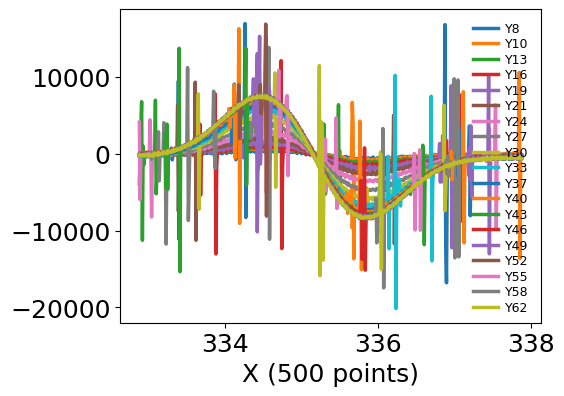

In [112]:
plt.figure(figsize=(15,8))
data.plot(x='X (500 points)', y=['Y8', 'Y10', 'Y13', 'Y16', 'Y19', 'Y21', 'Y24', 'Y27',
       'Y30', 'Y33', 'Y37', 'Y40', 'Y43', 'Y46', 'Y49', 'Y52', 'Y55', 'Y58',
       'Y62'],)

In [113]:
y_full = data.drop(['X (500 points)','Y55','Y62'], axis=1)
y_names = list(y_full.columns)

## Очиста данных от шума

In [114]:

for name in y_names:
    for i in range(1,len(y_full[name])):
        if abs(diff(y_full[name])[i]) < 700:
            y_full[name][i] = y_full[name][i]
        else:
            y_full[name][i] = (np.mean(y_full[name][i-7:i-5]))
        #y_full[name][i] = y_full[name][i] if abs(diff(y_full[name])[i]) < 350 else y_full[name][i] = (np.mean(y_full[name][i-11:i-5]));

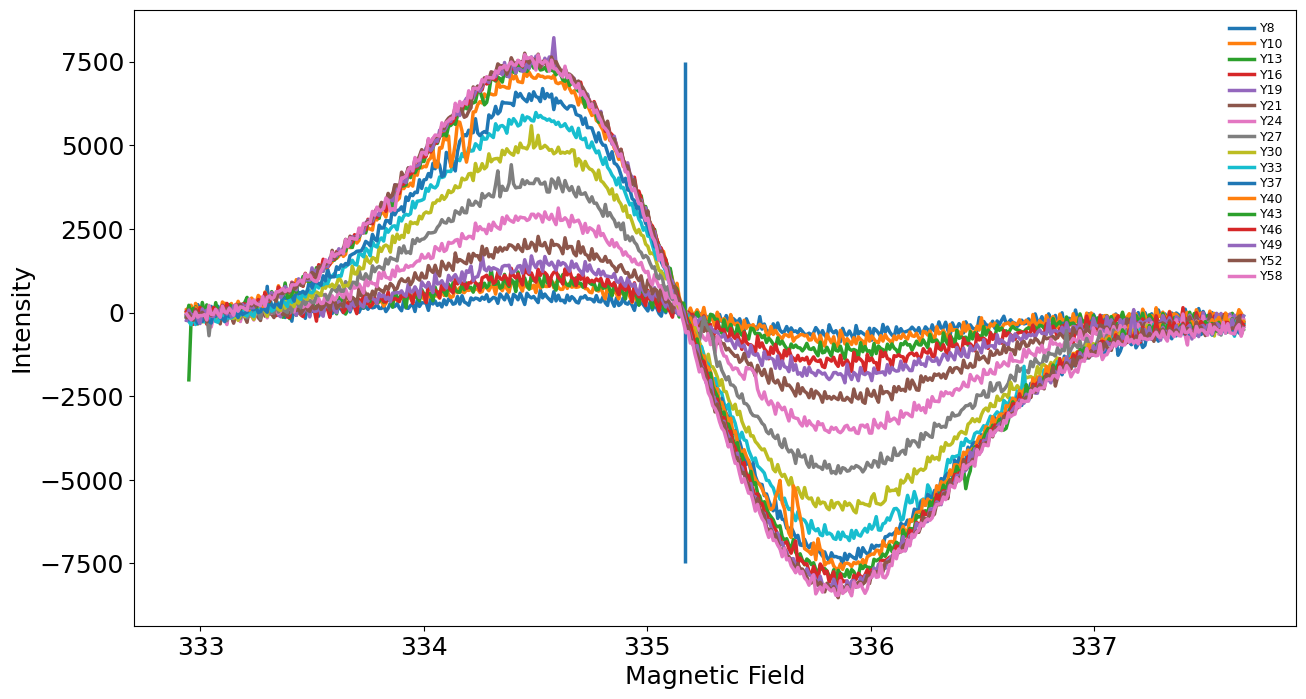

In [115]:
import seaborn as sns
plt.figure(figsize=(15,8))
plt.xlabel('Magnetic Field')
plt.ylabel('Intensity')
#plt.vlines(335.38, -7500,7500)
plt.vlines(335.17, -7500,7500)
for name in y_names:
    plt.plot(x[6:-21], y_full[name][6:-21], label=name) # посчитал в экселе сколько между 335.17 и 335.38 точек
    plt.legend()
    

## Сглаживание данных 

In [141]:
len(y_names)


17

In [131]:
list(range(10,40,3))

[10, 13, 16, 19, 22, 25, 28, 31, 34, 37]

In [139]:
time = [8,10, 13, 16, 19, 22, 25, 28, 31, 34, 37,40, 43, 46, 49, 52, 58]

In [140]:
len(time)

17

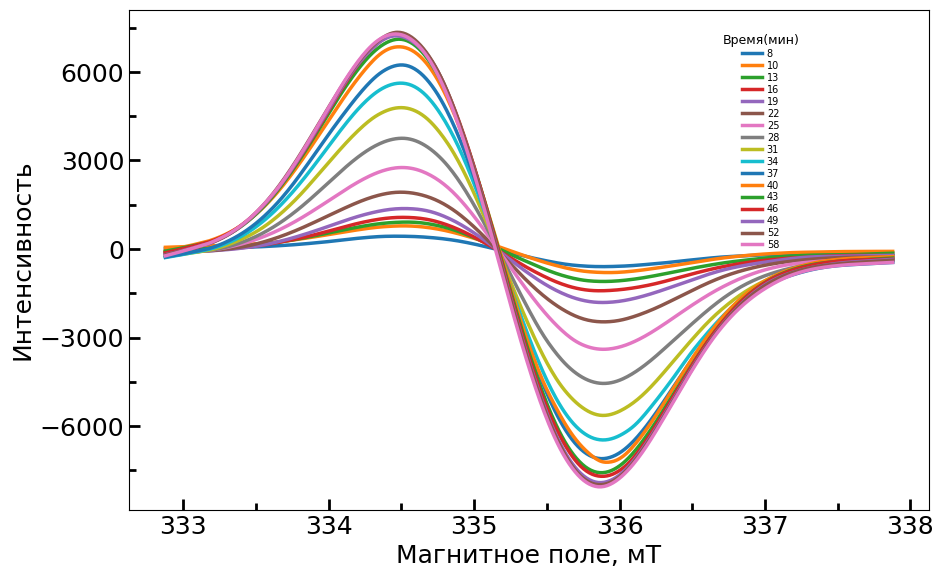

In [175]:
from statsmodels.nonparametric.smoothers_lowess import lowess
import seaborn as sns

fig = plt.figure(figsize=(8,5))
ax = plt.gca()
ax = fig.add_axes([0,0,1,1])

#plt.figure(figsize=(8,5))
plt.xlabel('Magnetic Field')
plt.ylabel('Intensity')
#plt.vlines(335.38, -7500,7500)
#plt.vlines(335.17, -4500,4500)

ax.xaxis.set_tick_params(which='major', size=8, width=2, direction='in', bottom='on')
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', bottom='on')
ax.yaxis.set_tick_params(which='major', size=8, width=2, direction='in', left='on')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', left='on')


ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(3000))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1500))

ax.set_xlabel('Магнитное поле, мТ')
ax.set_ylabel('Интенсивность')


for i,name in enumerate(y_names):
    filtered = lowess(y_full[name], x, is_sorted=True, frac=0.125, it=2)
    ax.plot(filtered[:,0], filtered[:,1],label=time[i])
    ax.legend(title="Время(мин)",fontsize =7,title_fontsize=9,bbox_to_anchor=(0.85, 0.5)) 
    
#plt.savefig('relaxation.png', bbox_inches='tight')
plt.show()

#plt.plot(x, y_full[y_names[10]], 'r')
#plt.plot(filtered[:,0], filtered[:,1], 'b')

In [157]:
directory = '/Users/smoluakov/Documents/DIPLOMA/EPR_DATA/16.03_CD220/EXCEL/generation/excel'
#list_of_files = sorted(os.listdir(directory))
data_small = pd.read_excel(directory+'/'+'cd220_gen_small.xlsx')
time_small = [8,24,37,58]
y_small = data_small.drop(['X (500 points)'], axis=1)
y_names_small = list(y_small.columns)

for name in y_names_small:
    for i in range(1,len(y_small[name])):
        if abs(diff(y_small[name])[i]) < 700:
            y_small[name][i] = y_small[name][i]
        else:
            y_small[name][i] = (np.mean(y_small[name][i-7:i-5]))
        #y_full[name][i] = y_full[name][i] if abs(diff(y_full[name])[i]) < 350 else y_full[name][i] = (np.mean(y_full[name][i-11:i-5]));

In [164]:
len(filtered[:,1])

500

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


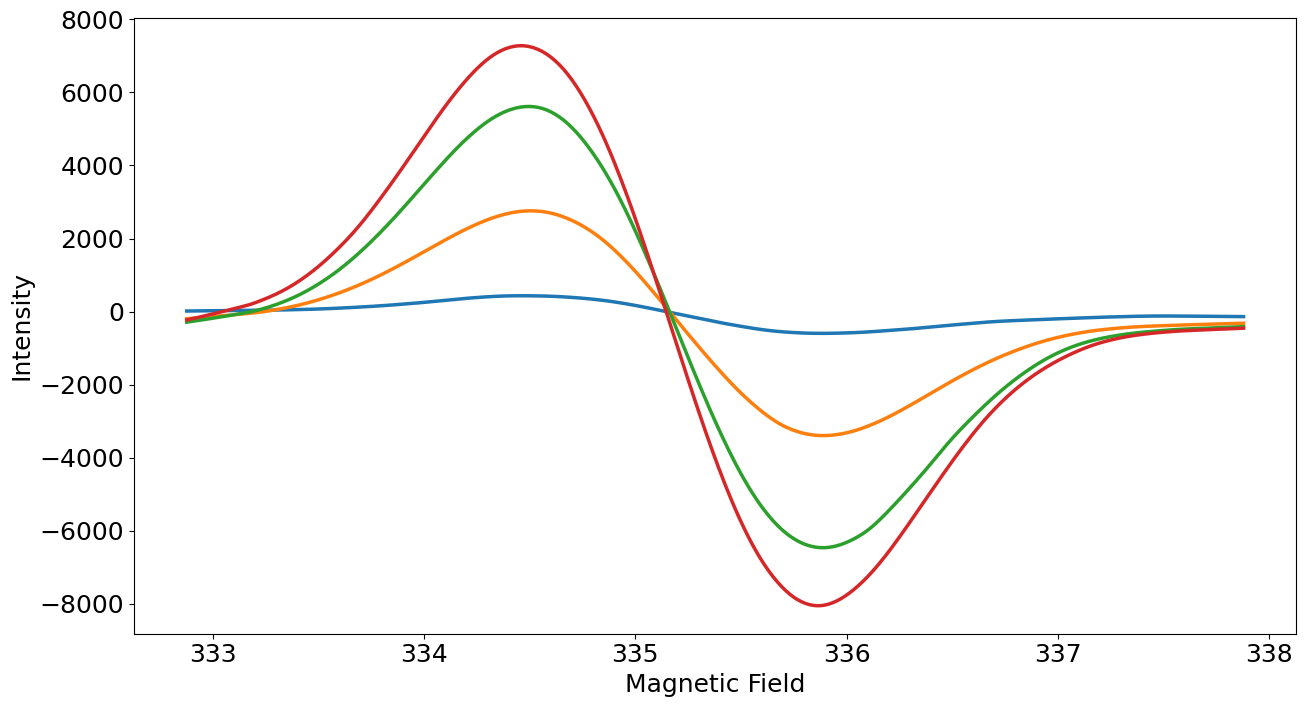

In [166]:
import seaborn as sns
plt.figure(figsize=(15,8))
plt.xlabel('Magnetic Field')
plt.ylabel('Intensity')
#plt.vlines(335.38, -7500,7500)
#plt.vlines(335.17, -7500,7500)
for name in y_names_small:
    filtered = lowess(y_small[name], x, is_sorted=True, frac=0.125, it=2)
    plt.plot(filtered[:,0], filtered[:,1])
    
    plt.legend()

In [178]:
len(filtered[:,0])

498

In [185]:
len(filtered[:498,1])

498

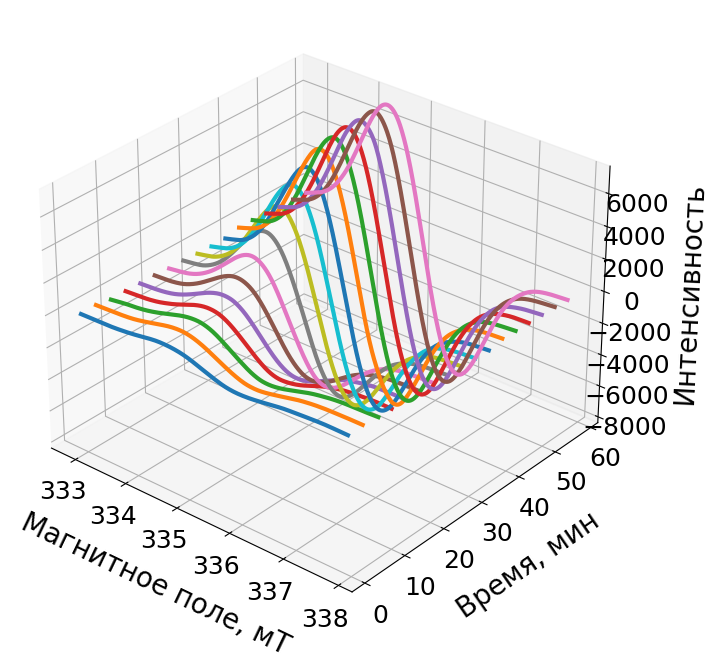

In [239]:
from matplotlib.collections import PolyCollection

fig = plt.figure(figsize=(8,8))
verts = []
ax = fig.add_subplot(projection='3d')


#for name in y_names:
ax.view_init(30, -50)
for i,name in enumerate(y_names):
    filtered = lowess(y_full[name], x, is_sorted=True, frac=0.125, it=2)
    ax.plot(filtered[:498,0], [time[i]]*len(x[:498]),filtered[:498,1],label=name, linewidth=3)

ax.set_xlabel('Магнитное поле, мT', fontsize=20,labelpad=15)
ax.set_ylabel('Время, мин',fontsize=20,labelpad=15)
ax.set_zlabel('Интенсивность',fontsize=20, labelpad=15);

plt.savefig(save_fig+'/generation_3d.png', bbox_inches='tight')

In [195]:
y_full.iloc[:,-1]

0     -135.961136
1      -99.030602
2     -167.396805
3     -139.537125
4      -88.241852
          ...    
495   -524.716919
496   -468.936768
497   -313.571838
498   -450.547150
499   -622.781982
Name: Y58, Length: 500, dtype: float64

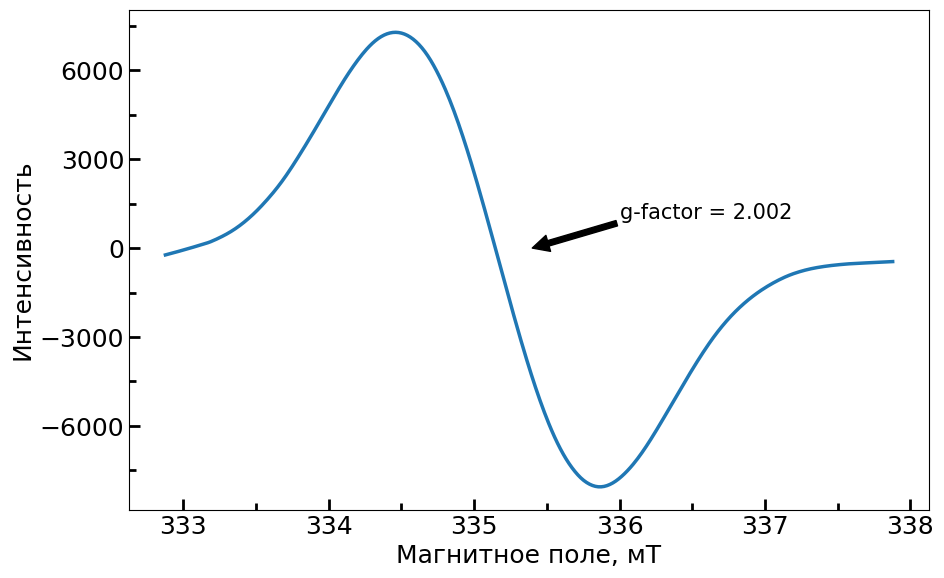

In [229]:
from statsmodels.nonparametric.smoothers_lowess import lowess
import seaborn as sns

fig = plt.figure(figsize=(8,5))
ax = plt.gca()
ax = fig.add_axes([0,0,1,1])

#plt.figure(figsize=(8,5))
plt.xlabel('Magnetic Field')
plt.ylabel('Intensity')
#plt.vlines(335.38, -7500,7500)
#plt.vlines(335.17, -4500,4500)

ax.xaxis.set_tick_params(which='major', size=8, width=2, direction='in', bottom='on')
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', bottom='on')
ax.yaxis.set_tick_params(which='major', size=8, width=2, direction='in', left='on')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', left='on')


ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(3000))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1500))

ax.set_xlabel('Магнитное поле, мТ')
ax.set_ylabel('Интенсивность')



filtered = lowess(y_full.iloc[:,-1], x, is_sorted=True, frac=0.125, it=2)
ax.plot(filtered[:,0], filtered[:,1],label=time[-1])
ax.annotate('g-factor = 2.002 ', xy=(335.4, 0), xytext=(336, 1000.7),
            arrowprops=dict(facecolor='black', shrink=100.01), fontsize=15)
#ax.legend(title="Время(мин)",fontsize =7,title_fontsize=9,bbox_to_anchor=(0.85, 0.5)) 
    
#plt.savefig('relaxation.png', bbox_inches='tight')
plt.show()

#plt.plot(x, y_full[y_names[10]], 'r')
#plt.plot(filtered[:,0], filtered[:,1], 'b')

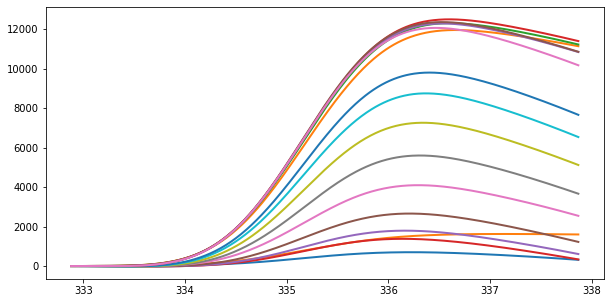

In [570]:
a = []
fig = plt.figure(figsize=(10,5))
verts = []
for i,name in enumerate(y_names):
    q = []
    for j in range(1,len(x)):
        q.append(integrate.simps(y_full[name][:j], x[:j], dx=x[:j], even='first'))
    q_1 = []
    for k in range(1,len(x)):   
        q_1.append(integrate.simps(q[:k], x[:k], dx=x[:k], even='first'))
    a.append(max(q_1))
    plt.plot(x[:499],q_1,linewidth=2)
    

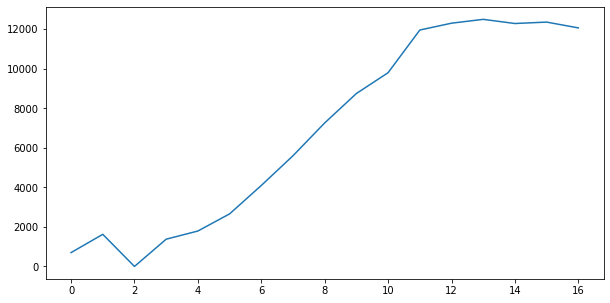

In [569]:
fig = plt.figure(figsize=(10,5))
plt.plot(range(len(a)), a)

# Relaxation

In [612]:
directory_2 = "EXCEL/relaxation"
list_of_files_2 = sorted(os.listdir(directory))
data_2 = pd.read_excel(directory+'/'+'FieldDelay_1-65min.xlsx')

In [613]:
x_2 = data_2['X (500 points)']

<AxesSubplot:xlabel='X (500 points)'>

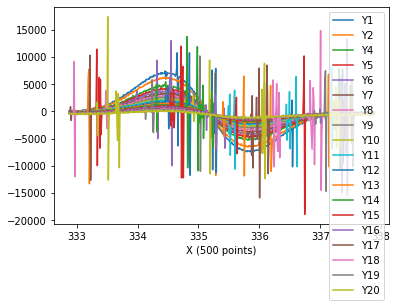

In [614]:
data_2.plot(x='X (500 points)', y=y_names_2)

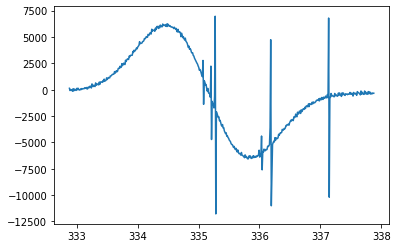

In [616]:
plt.plot(x_2,data_2['Y2'] )

In [617]:
y_full_2 = data_2.drop(['X (500 points)','Y2','Y3'], axis=1)
y_names_2 = list(y_full_2.columns)

In [618]:
for name in y_names_2:
    for i in range(1,len(y_full_2[name])):
        if abs(diff(y_full_2[name])[i]) < 700:
            y_full_2[name][i] = y_full_2[name][i]
        else:
            y_full_2[name][i] = (np.mean(y_full_2[name][i-5:i-3]))

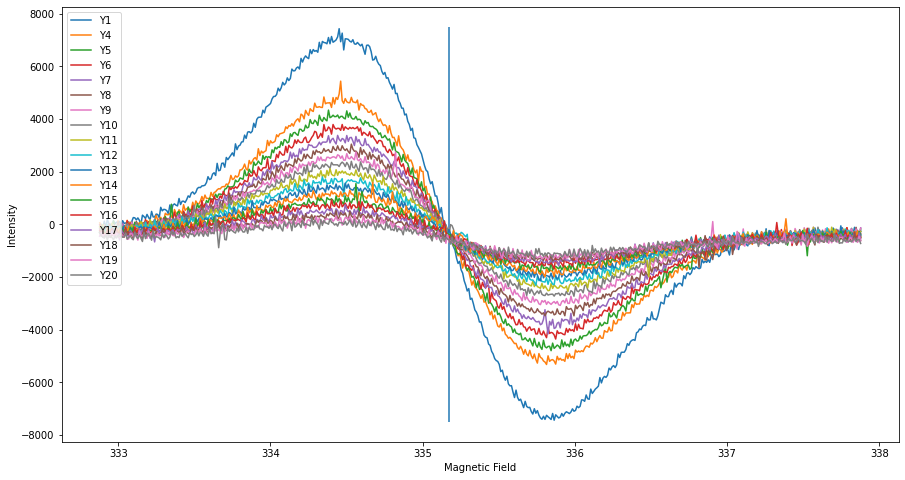

In [619]:
plt.figure(figsize=(15,8))
plt.xlabel('Magnetic Field')
plt.ylabel('Intensity')
#plt.vlines(335.38, -7500,7500)
plt.vlines(335.17, -7500,7500)
for name in y_names_2:
    plt.plot(x_2, y_full_2[name], label=name) # посчитал в экселе сколько между 335.17 и 335.38 точек
    plt.legend()
    

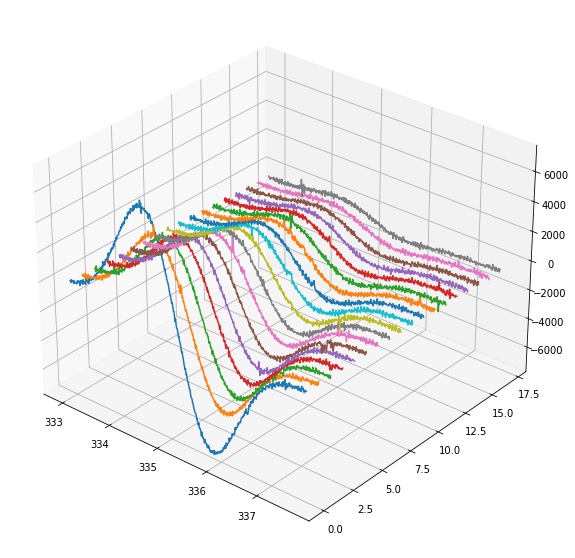

In [621]:
from matplotlib.collections import PolyCollection

fig = plt.figure(figsize=(10,10))
verts = []
ax = fig.add_subplot(projection='3d')
#for name in y_names:
ax.view_init(30, -50)
for i,name in enumerate(y_names_2):
    ax.plot(x_2[6:-21],  [i]*len(x_2[6:-21]),y_full_2[name][6:-21],)

# Двойные интегралы из спинозы

In [3]:
path = "/Users/smoluakov/Documents/DIPLOMA/EPR_DATA/16.03_CD220/EXCEL/relaxation/double_integrals_spinoza.xlsx"
data = pd.read_excel(path)

In [7]:
doub_int = []
for column in data.columns[1:]:
    doub_int.append(np.max(data[column]))

In [63]:
len(doub_int)

19

In [86]:
time = list(range(1,58,3))

In [87]:
len(time)

19

In [234]:
time = np.linspace(1, 65, 19)

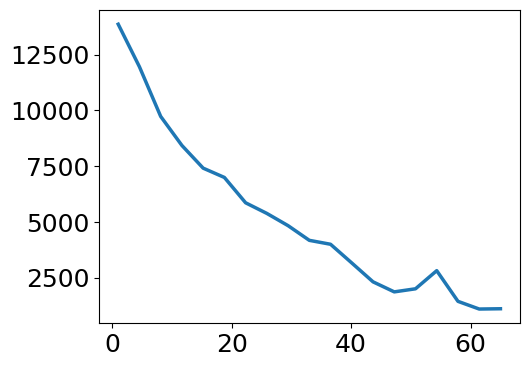

In [235]:
plt.plot(time, doub_int)

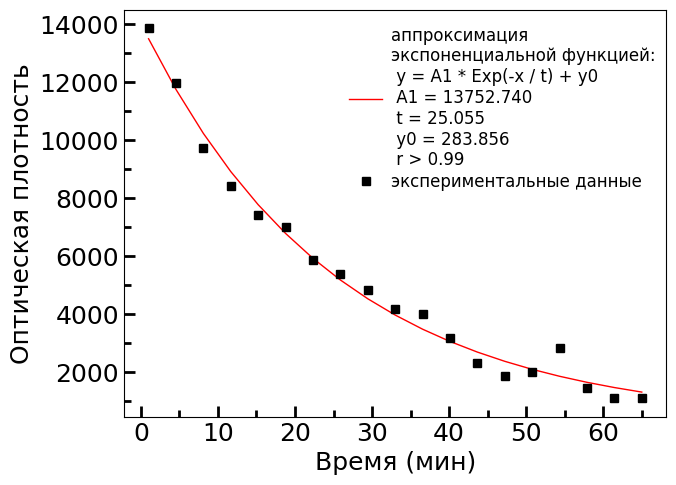

In [243]:
def exponenial_func_1(x, a, b, c):
    return a*np.exp(x/(-b))+c

popt, pcov = scipy.optimize.curve_fit(exponenial_func_1, time,doub_int, bounds=(0, [17000, 30, 1000]))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.xaxis.set_tick_params(which='major', size=8, width=2, direction='in', bottom='on')
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', bottom='on')
ax.yaxis.set_tick_params(which='major', size=8, width=2, direction='in', left='on')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', left='on')

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))

ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(2000))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1000))

ax.set_xlabel('Время (мин)')
ax.set_ylabel('Оптическая плотность')


ax.plot(time, exponenial_func_1(time, *popt),linewidth= 1, color='red',
        label='аппроксимация\nэкспоненциальной функцией:\n y = A1 * Exp(-x / t) + y0 \n A1 = %5.3f\n t = %5.3f\n y0 = %5.3f\n r > 0.99' % tuple(popt))    
ax.plot(time,doub_int,'s',markersize=6,markerfacecolor='black',markeredgecolor='black',label='экспериментальные данные')
#ax.text(10,0.25,'(б)',fontsize=25)
#ax.set_title('Кинетика изменения оптической плотности в полосе поглощения дикатион-радикала в процессе анодной поляризации', pad=14, fontsize=20 )
ax.legend(bbox_to_anchor=(1.01, 1),fontsize =12,title_fontsize=14)
plt.savefig(save_fig+'/expfit_relax_rus.png', transparent=False, bbox_inches='tight') 
plt.show()

In [107]:
popt

array([13752.73959894,    25.05475482,   283.85552329])

In [106]:
my_rho = np.corrcoef(doub_int, exponenial_func_1(time, *popt))
my_rho

array([[1.        , 0.99428195],
       [0.99428195, 1.        ]])

### Двойные интегралы на сырых данных. Неудача, т.к необходимо бейзлайн коррекция и фиттинг гауссом

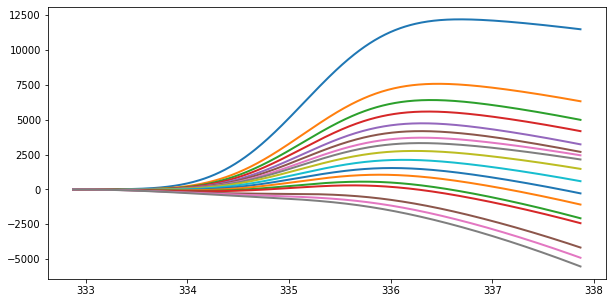

In [666]:
a_2 = []
fig = plt.figure(figsize=(10,5))
verts_2 = []
for i,name in enumerate(y_names_2):
    q_2 = []
    for j in range(1,len(x_2)):
        q_2.append(integrate.simps(y_full_2[name][:j], x_2[:j], dx=x_2[:j], even='first'))
    q_3 = []
    for k in range(1,len(x_2)):   
        q_3.append(integrate.simps(q_2[:k], x_2[:k], dx=x_2[:k], even='first'))
    a_2.append(max(q_3))
    plt.plot(x_2[:499],q_3,linewidth=2)
    

In [647]:
a_2[:-4]

[12196.47571957673,
 7573.972214900372,
 6409.390169352884,
 5583.981305840808,
 4740.536110778666,
 4179.734982455646,
 3709.2081826445474,
 3321.9426206648113,
 2759.4177721492406,
 2120.7008715374295,
 1532.7960054088257,
 1053.0460908571881,
 555.4236189941382,
 289.137700848634]

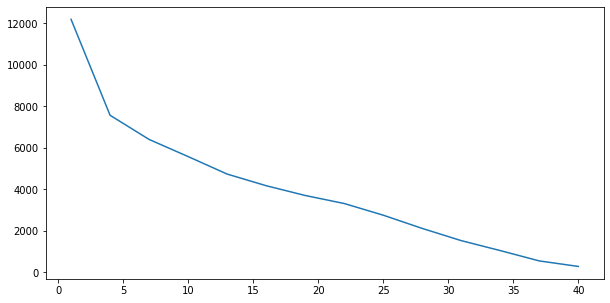

In [651]:
fig = plt.figure(figsize=(10,5))
plt.plot(range(1,43,3), a_2[:-4])

In [653]:
def exponenial_func_1(x, a, b, c):
    return a*np.exp(x/(-b))+c

popt, pcov = scipy.optimize.curve_fit(exponenial_func_1, range(1,43,3), a_2[:-4])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/optimize/minpack.py:807: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


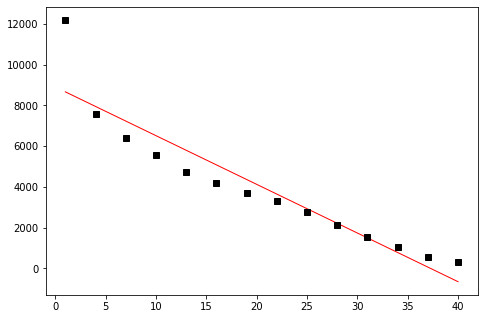

In [654]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.plot(range(1,43,3), exponenial_func_1(range(1,43,3), *popt),linewidth= 1, color='red',
        label=' Fitted Function:\n y = A1 * Exp(-x / t) + y0 \n A1 = %5.3f\n t = %5.3f\n y0 = %5.3f\n r = 0.999' % tuple(popt))    
ax.plot(range(1,43,3), a_2[:-4],'s',markersize=6,markerfacecolor='black',markeredgecolor='black',label='experiment')

In [655]:
popt

array([-50031098.34616727,   -209309.34646987,  50040000.61345528])

In [632]:
pcov

array([[-5.32443621e+20, -9.37380642e+17,  5.32443620e+20],
       [-9.37380642e+17, -1.65028253e+15,  9.37380641e+17],
       [ 5.32443620e+20,  9.37380641e+17, -5.32443619e+20]])

In [672]:
a_3 = [12196.47571957673,10000, 8200, 7573.972214900372,
 6409.390169352884,
 5583.981305840808,
 4740.536110778666,
 4179.734982455646,
 3709.2081826445474,
 3321.9426206648113,
 2759.4177721492406,
 2120.7008715374295,
 1532.7960054088257,
 1053.0460908571881,
 555.4236189941382,
 289.137700848634,100,50,20,0]

In [670]:
a_2

[12196.47571957673,
 7573.972214900372,
 6409.390169352884,
 5583.981305840808,
 4740.536110778666,
 4179.734982455646,
 3709.2081826445474,
 3321.9426206648113,
 2759.4177721492406,
 2120.7008715374295,
 1532.7960054088257,
 1053.0460908571881,
 555.4236189941382,
 289.137700848634,
 0.0,
 0.0,
 0.0,
 0.0]

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/optimize/minpack.py:807: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


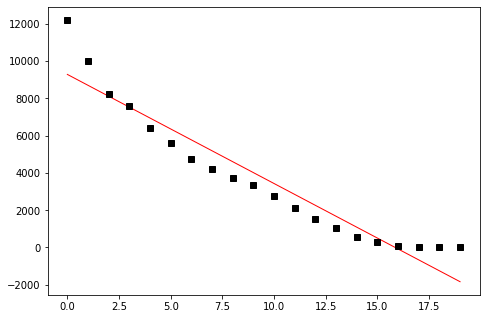

In [674]:
popt= 0
def exponenial_func_1(x, a, b, c):
    return a*np.exp(x/(-b))+c

popt, pcov = scipy.optimize.curve_fit(exponenial_func_1, range(len(a_3)), a_3)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.plot(range(len(a_3)), exponenial_func_1(range(len(a_3)), *popt),linewidth= 1, color='red',
        label=' Fitted Function:\n y = A1 * Exp(-x / t) + y0 \n A1 = %5.3f\n t = %5.3f\n y0 = %5.3f\n r = 0.999' % tuple(popt))    
ax.plot(range(len(a_3)), a_3,'s',markersize=6,markerfacecolor='black',markeredgecolor='black',label='experiment')

In [675]:
popt

array([-86937598.17175092,   -148677.59902721,  86946873.19261864])

In [710]:
from BaselineRemoval import BaselineRemoval

input_array=[10,20,1.5,5,2,9,99,25,47]
polynomial_degree=2 #only needed for Modpoly and IModPoly algorithm

baseObj=BaselineRemoval(y_full_2['Y1'][:-21])

Modpoly_output=baseObj.ModPoly(polynomial_degree)
Imodpoly_output=baseObj.IModPoly(polynomial_degree)
Zhangfit_output=baseObj.ZhangFit()

#print('Original input:',input_array)
#print('Modpoly base corrected values:',Modpoly_output)
#print('IModPoly base corrected values:',Imodpoly_output)
#print('ZhangFit base corrected values:',Zhangfit_output)

WARING max iteration reached!


## Попытки бейзлайн коррекции

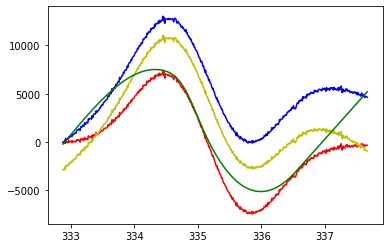

In [711]:
plt.plot(x_2[:-21],y_full_2['Y1'][:-21], 'r')
plt.plot(x_2[:-21], Modpoly_output, 'b')
plt.plot(x_2[:-21], Imodpoly_output, 'y')
plt.plot(x_2[:-21], base[:-21], 'g')


In [685]:
from scipy import sparse
from scipy.sparse.linalg import spsolve

def baseline_als(y, lam, p, niter=10):
    L = len(y)
    D = sparse.csc_matrix(np.diff(np.eye(L), 2))
    w = np.ones(L)
    for i in range(niter):
        W = sparse.spdiags(w, 0, L, L)
        Z = W + lam * D.dot(D.transpose())
        z = spsolve(Z, w*y)
        w = p * (y > z) + (1-p) * (y < z)
    return z



In [704]:
base = baseline_als(y_full_2['Y1'],2,1)

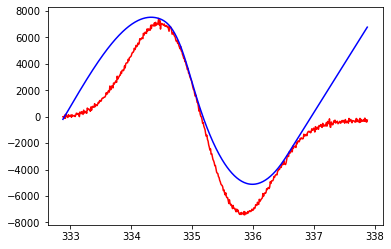

In [705]:
plt.plot(x_2,y_full_2['Y1'], 'r')
plt.plot(x_2, base, 'b')

## Сглаживание сырых данных 

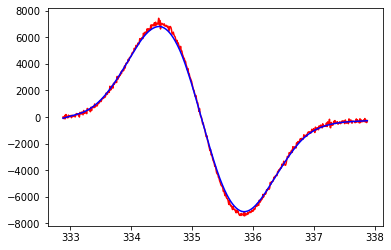

In [729]:
from statsmodels.nonparametric.smoothers_lowess import lowess


filtered = lowess(y_full_2['Y1'], x_2, is_sorted=True, frac=0.125, it=2)

plt.plot(x_2, y_full_2['Y1'], 'r')
plt.plot(filtered[:,0], filtered[:,1], 'b')

In [730]:
q = []
for i in range(1,len(filtered[:,0])):
    q.append(integrate.simps(filtered[:,1][:i], filtered[:,0][:i], dx=filtered[:,0][:i], even='first'))

q_1 = []
for i in range(1,len(filtered[:,0])):
    q_1.append(integrate.simps(q[:i], filtered[:,0][:i], dx=filtered[:,0][:i], even='first'))

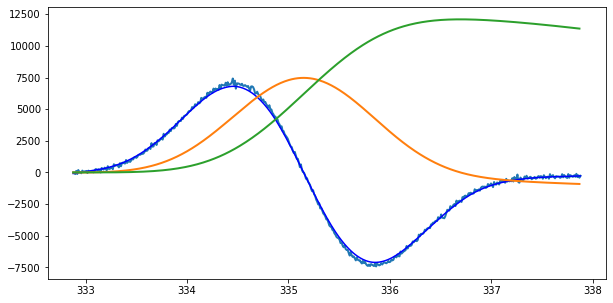

In [731]:
plt.figure(figsize=(10,5))
plt.plot(x_2,y_full_2['Y1'], linewidth=2)
plt.plot(filtered[:,0], filtered[:,1], 'b')
plt.plot(filtered[:,0][:499],q,linewidth=2)
plt.plot(filtered[:,0][:499],q_1,linewidth=2)